In [1]:
from PIL import Image, ImageEnhance, ExifTags
from PIL.ExifTags import TAGS

import numpy as np
import matplotlib.pyplot as plt

import re
import os
from os import walk
import math
import time

In [22]:
wd = os.getcwd()

fnames = []
images = []

for (dirpath, dirnames, filenames) in walk(wd):  
    fnames.append(dirnames)
    fnames.append(filenames)

for file in fnames[-1]:
    images.append(Image.open(fnames[0][-1] + "/" + file))



    
img = Image.open("images/exp0.jpg")
# img1 = Image.open("images/GDSC_0839.jpg")
# img2 = Image.open("images/DSC_0793_edited.jpg")
# imgbw = Image.open("images/DSC_0659.jpg")
# imgblack = Image.open("images/DSC_0016.jpg")
# imgwhite = Image.open("images/DSC_0017.jpg")
# imgmix = Image.open("images/DSC_0018.jpg")


In [98]:
imgarr = np.asarray(img)
print(imgarr)

[[[ 73  78 118]
  [ 70  75 115]
  [ 68  76 115]
  ...
  [ 87  58  44]
  [ 90  58  47]
  [ 89  57  46]]

 [[ 68  76 113]
  [ 68  76 113]
  [ 69  77 114]
  ...
  [ 91  58  49]
  [ 92  58  49]
  [ 90  56  47]]

 [[ 69  74 114]
  [ 71  76 116]
  [ 68  76 113]
  ...
  [ 90  57  48]
  [ 90  58  47]
  [ 89  57  46]]

 ...

 [[ 49  34  31]
  [ 48  33  30]
  [ 47  33  32]
  ...
  [202 121  78]
  [201 120  77]
  [201 118  76]]

 [[ 49  35  34]
  [ 49  35  34]
  [ 46  32  29]
  ...
  [204 121  79]
  [202 119  77]
  [203 118  77]]

 [[ 49  33  33]
  [ 48  32  32]
  [ 45  33  33]
  ...
  [203 120  78]
  [204 119  80]
  [203 118  79]]]


In [132]:
class imgArray():
    def __init__(self, image):
        self.img = image
        print(self.img)
        
        self.array = np.asarray(self.img)
        self.avg = []
        
        self.rgb()
        
        #print(self.array.shape)
        
    
    def getexifdata(self):
    
        inputimage = self.img
        
        exifdata = inputimage._getexif()
        wantedtags = ["ISOSpeedRatings", "FocalLength", "MaxApertureValue", 
                      "ExposureTime", "FNumber", "WhiteBalance", "MeteringMode", 
                      "LightSource", "Contrast", "Saturation", "Sharpness"]
        fdata = {}

        for tagid, data in exifdata.items():
            name = TAGS.get(tagid, tagid)

            #print(name, tagid)

            if name in wantedtags:
                fdata[name] = data

        return fdata
    
    
    def rgb(self):
        self.red = self.array[:,:,0]
        self.green = self.array[:,:,1]
        self.blue = self.array[:,:,2]
        
        
#     too slow
#     def pmeans(self, array):
#         for row in array:
#             for col in row:
#                 self.avg.append(np.mean(col))
            
    
    def hist(self, xrnge=[-50,300], yrnge=[0,400]):
    
        assert isinstance(xrnge, list) and isinstance(yrnge, list), "both xrnge and yrnge attributes should be lists"

        self.histarray = self.img.histogram()
        
        
        
        tmpplot = plt.hist(range(0, 256), weights=self.histarray[0:256], bins = 255)
        tmpplot = plt.hist(range(0, 256), weights=self.histarray[256:512], bins = 255)
        tmpplot = plt.hist(range(0, 256), weights=self.histarray[512:768], bins = 255)
        
        
        
#         plt.hist(self.histarray, bins = 255)
#         avgplot = plt.gca()
#         avgplot.set_ylim(yrnge)
#         avgplot.set_xlim(xrnge)
#         plt.show()
        
#         if isinstance(averages[0], list):
#             loop = len(averages)
#         else:
#             loop = 1
#             averages = [averages]

#         loop = 3
#         print(loop)

#         for x in range(loop):

#             plt.hist(self.red[x], bins = 100)
#             avgplot = plt.gca()
#             avgplot.set_ylim(yrnge)
#             avgplot.set_xlim(xrnge)
#         plt.show()
            
    
    pixels = []

    def adjust(pixel, nums, scale, shift):
        nums.sort()

        pixels.append(pixel)
        if nums[1] > pixel > nums[0]:
            return (pixel + shift) * scale
        return pixel
    
    
    def editimage(self, scale, shift = 0, nums=[-1,257], show=True):
    
        assert isinstance(show, bool), "show attribute should be a boolean"

        out = image_in.point(lambda i: adjust(i, nums, scale, shift))


        if show:

            out.show()
        else:
            #time.sleep(0.1)
            return out
        
        
    def get_std(self):
        return np.std(self.red)
        
#         arrlen = len(self.red)
#         arrsum = sum(self.array)

#         arrmean = arrsum / arrlen

#         arrdev = [(x - arrmean)**2 for x in self.array]

#         arraystd = sum(arrdev) / len(arrdev)

#         return arraystd


In [127]:
print(imgarr[:,:,0:4][0].shape)

(6000, 3)


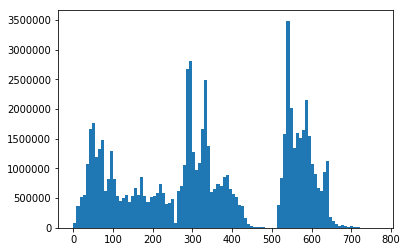

In [128]:
#print(len(images[0].histogram()))

tmpplot = plt.hist(range(0, 768), weights=images[0].histogram(), bins = 100)


In [133]:
test = imgArray(images[0])

test.get_std()

<PIL.MpoImagePlugin.MpoImageFile image mode=RGB size=6000x4000 at 0xA8023B0>


MemoryError: 

In [17]:
len(test.avg)

18039099

In [3]:
def getexifdata(inputimage):
    
    exifdata = inputimage._getexif()

    wantedtags = ["ISOSpeedRatings", "FocalLength", "MaxApertureValue", 
                  "ExposureTime", "FNumber", "WhiteBalance", "MeteringMode", 
                  "LightSource", "Contrast", "Saturation", "Sharpness"]
    
    fdata = {}

    for tagid, data in exifdata.items():
        name = TAGS.get(tagid, tagid)
        
        #print(name, tagid)

        if name in wantedtags:
            fdata[name] = data

    return fdata

In [4]:
outdata = []

for img in images:
    outdata.append(getexifdata(img))

In [77]:
def pmeans(array, averages):
     for x in array:
        for y in x:
            averages.append(y.mean())

In [6]:
def hist(averages, xrnge=[-50,300], yrnge=[0,400]):
    
    assert isinstance(xrnge, list) and isinstance(yrnge, list), "both xrnge and yrnge attributes should be lists"
    
    if isinstance(averages[0], list):
        loop = len(averages)
    else:
        loop = 1
        averages = [averages]
        
    print(loop)
        
    for x in range(loop):

        plt.hist(averages[x], bins = 100)
        avgplot = plt.gca()
        avgplot.set_ylim(yrnge)
        avgplot.set_xlim(xrnge)
        plt.show()

#hist([avgiso1, avgiso2, avgiso3])
    
# yax = [0, 400]
# xax = [-50,300]

# plt.hist(sorted(avgiso1), bins = 100)
# avgplot = plt.gca()
# avgplot.set_ylim(yax)
# avgplot.set_xlim(xax)
# plt.show()

# plt.hist(sorted(avgiso2), bins = 100)
# avgplot = plt.gca()
# avgplot.set_ylim(yax)
# avgplot.set_xlim(xax)
# plt.show()

# plt.hist(sorted(avgiso3), bins = 100)
# avgplot = plt.gca()
# avgplot.set_ylim(yax)
# avgplot.set_xlim(xax)
# plt.show()

In [7]:
lightall = np.asarray(images[8])
lightmain = np.asarray(images[9])
lightnone = np.asarray(images[10])
lightside = np.asarray(images[11])

In [8]:
avglighta = []
avglightm = []
avglightn = []
avglights = []

pmeans(lightall, avglighta)
pmeans(lightmain, avglightm)
pmeans(lightnone, avglightn)
pmeans(lightside, avglights)

# avglightn = [x * 10 + 60 for x in avglightn]
# avglights = [x * 2.7 for x in avglights]


print(float(sum(avglighta)) / float(len(avglighta)))
print(float(sum(avglights)) / float(len(avglights)))

print((float(sum(avglighta)) / float(len(avglighta))) / (float(sum(avglights)) / float(len(avglights))))


200.7843888888852
74.43094444444324
2.6975929217014665


4


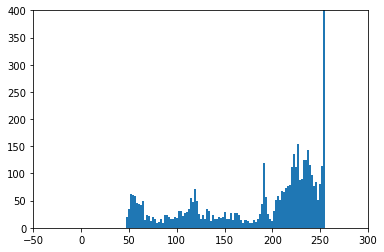

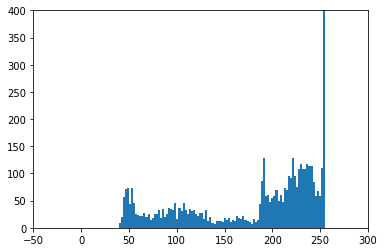

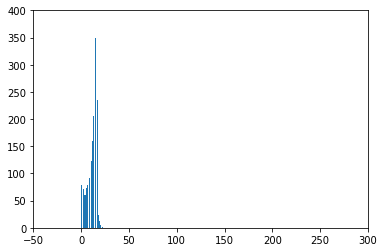

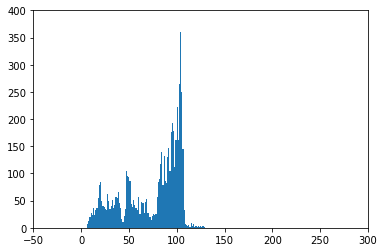

In [9]:
hist([avglighta, avglightm, avglightn, avglights])


# yax = [0, 400]
# xax = [-50,300]

# plt.hist(sorted(avglighta), bins = 100)
# avgplot = plt.gca()
# avgplot.set_ylim(yax)
# avgplot.set_xlim(xax)
# plt.show()

# plt.hist(sorted(avglightm), bins = 100)
# avgplot = plt.gca()
# avgplot.set_ylim(yax)
# avgplot.set_xlim(xax)
# plt.show()

# plt.hist(sorted(avglightn), bins = 100)
# avgplot = plt.gca()
# avgplot.set_ylim(yax)
# avgplot.set_xlim(xax)
# plt.show()

# plt.hist(sorted(avglights), bins = 100)
# avgplot = plt.gca()
# avgplot.set_ylim(yax)
# avgplot.set_xlim(xax)
# plt.show()

In [10]:
pixels = []

def adjust(pixel, nums, scale, shift):
    nums.sort()
    
    pixels.append(pixel)
    if nums[1] > pixel > nums[0]:
        return (pixel + shift) * scale
    return pixel

In [11]:
def editimage(image_in, scale, shift = 0, nums=[-1,257], show=True):
    
    assert isinstance(show, bool), "show attribute should be a boolean"
    
    out = image_in.point(lambda i: adjust(i, nums, scale, shift))
    
    
    if show:
        
        out.show()
    else:
        time.sleep(0.1)
        return out

# out = images[1].point(lambda i: adjust(i))

# #display image
# out.show()

In [12]:
editimage(image_in = images[1], nums = [30, 45], scale = 1.7)

In [13]:
editimage(images[1], 1)

In [105]:
# source = images[11].split()

# R, G, B = 0, 1, 2

# # select regions where red is less than 100
# mask = source[R].point(lambda i: i < 100 and 255)

# # process the green band
# out = source[G].point(lambda i: i * 0.7)

# # paste the processed band back, but only where red was < 100
# source[G].paste(out, None, mask)

# # build a new multiband image
# im = Image.merge(images[11].mode, source)

# im.show()

In [ ]:
# check for average of maxes and mins to deterine if photo is over or under exposed
# maybe just edit first photo and use histogram to adjust all sequential photos
# 

In [14]:
def std(array):
    arrlen = len(array)
    arrsum = sum(array)
    
    arrmean = float(arrsum) / float(arrlen)
    
    arrdev = [(x - arrmean)**2 for x in array]
    
    arrstd = float(sum(arrdev)) / float(len(arrdev))
    
    return arrstd

In [15]:
print(std(avglighta))
print(std(avglightm))
print(std(avglightn))
print(std(avglights))

4095.556085922771
4589.240470370294
29.639673777777865
885.1541572561738


In [162]:
sunset1 = np.array(images[13])
sunsetp1 = np.asarray(images[14])
sunset2 = np.asarray(images[15])
sunsetp2 = np.asarray(images[16])

In [163]:
print(sunset1)
print(sunset1)

<PIL.MpoImagePlugin.MpoImageFile image mode=RGB size=6000x4000 at 0x64566F0>
<PIL.MpoImagePlugin.MpoImageFile image mode=RGB size=6000x4000 at 0x64566F0>


In [19]:
sunavg1 = []
sunavgp1 = []
sunavg2 = []
sunavgp2 = []

pmeans(sunset1, sunavg1)
pmeans(sunsetp1, sunavgp1)
pmeans(sunset2, sunavg2)
pmeans(sunsetp2, sunavgp2)

In [72]:
print(len(sunavg1))

6000


1


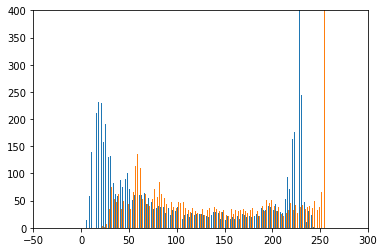

In [20]:
# hist([sunavg1, sunavg2, sunavgp1, sunavgp2])

hist([[sunavg2, sunavgp2]])

In [25]:
# print(std(sunavg2))
# print(std(sunavgp2))

# stdratio = std(sunavg2) / std(sunavgp2)

# scaler = stdratio**0.5
# print(scaler)

# avglightscaled = [x * scaler for x in sunavg2]

# print(std(sunavg2) / std(avglightscaled))

# print(avglightscaled[0:5])

# hist([[avglightscaled, sunavg2, sunavgp2]])

# editimage(images[16], scaler)

In [ ]:
# #Notes

# std dev is not enough, need more variables in alg

# ideas:
#     mean
#     mode
#     median
#     x min and max
#     y min and max
#     local/smaller population size analysis
#     log?
#     IQR?
#     somethign to do with violin plot?

In [26]:
def mean(array):
    arrsum = sum(array)
    arrlen = len(array)

    return arrsum / arrlen

In [27]:
def mode(array):

    counter = [0 for x in range(256)]

    for x in array:
        counter[int(x)] += 1
    
    return np.argmax(counter)

In [28]:
def median(array):
    array.sort()
    
    arrlen = (len(array) / 2) - 1

    if arrlen == math.floor(arrlen):
        lownum = array[int(arrlen)]
        highnum = array[int(arrlen+1)]
        return mean([lownum, highnum])
    else:
        return array[int(math.floor(arrlen))]

In [29]:
def IQR(array):
    thirdq, firstq = np.percentile(array, [75 ,25])
    iqr = thirdq - firstq
    
    return iqr

In [30]:
def datarange(array):
    array.sort()
    arrlen = len(array)
    
    range10 = int(math.floor(arrlen / 10))
    
    top10 = array[:range10+1]
    low10 = array[arrlen-range10:]
    
    return [mean(top10), mean(low10)]

In [31]:
def summary(array):
    print("==========================")
    
    print("Mean:               " + str(mean(array)))
    
    print("Mode:               " + str(mode(array)))
    
    print("Median:             " + str(median(array)))
    
    print("IQR:                " + str(IQR(array)))
    
    print("Std Dev:            " + str(std(array)))
    
    print("High & low range:   " + str(datarange(array)))
    
    print("==========================")


In [32]:
def match(array, scale):
    return [x * scale for x in array]

In [33]:
summary(sunavg1)
summary(sunavg2)

Mean:               184.99677777777646
Mode:               254
Median:             197.66666666666666
IQR:                136.66666666666666
Std Dev:            4635.10161924693
High & low range:   [78.09706045479754, 254.99222222222218]
Mean:               117.46655555555544
Mode:               229
Median:             93.0
IQR:                190.66666666666666
Std Dev:            7509.4333259137065
High & low range:   [14.019412090959506, 231.50944444444443]


1


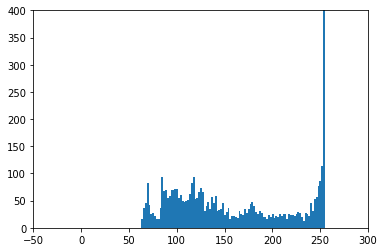

1


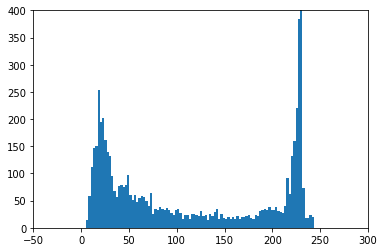

In [34]:
hist(sunavg1)
hist(sunavg2)

1


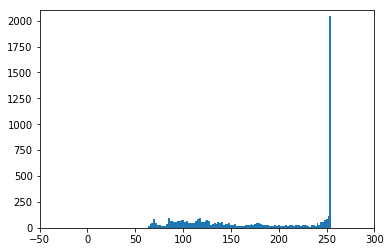

1


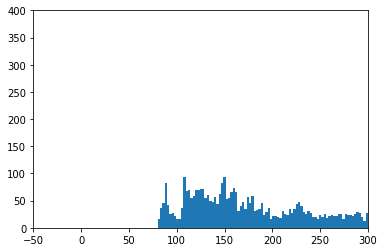

1


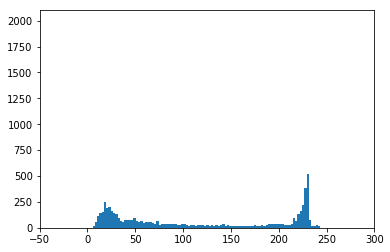

In [35]:
hist(sunavg1, yrnge = [0, 2100])
hist(match(sunavg1, (std(sunavg2) / std(sunavg1))**0.5))
hist(sunavg2, yrnge = [0,2100])

In [36]:
editimage(images[15], 0, nums = [215, 245])

1.6201226947714198
1


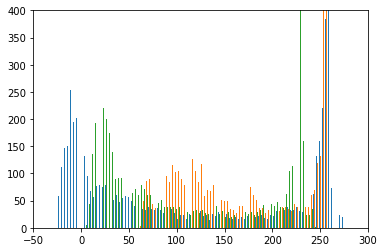

In [49]:
stdratio = std(sunavg2) / std(sunavg1)

scaler = stdratio**0.5
print(stdratio)

meandif = (mean(sunavg2) - mean(sunavg1)) / 2

avglightscaled = [(x + meandif) * scaler for x in sunavg2]

# print(std(sunavg2) / std(avglightscaled))

# print(avglightscaled[0:5])

hist([[avglightscaled, sunavg1, sunavg2]])

editimage(images[15], scaler, shift = meandif)

In [12]:
# im = Image.fromarray(imarr)